In [1]:
import sqlite3

# Create or connect to SQLite database
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Drop table if exists (clean start)
cursor.execute("DROP TABLE IF EXISTS sales")

# Create new table
cursor.execute("""
CREATE TABLE sales (
  id INTEGER PRIMARY KEY AUTOINCREMENT,
  product TEXT,
  quantity INTEGER,
  price REAL
)
""")

# Sample data insert
data = [
    ("Shoes", 10, 50),
    ("Shoes", 5, 50),
    ("Shirt", 8, 25),
    ("Shirt", 7, 25),
    ("Watch", 3, 100),
    ("Watch", 2, 100)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", data)
conn.commit()
conn.close()

In [2]:
import pandas as pd

# Connect to the database
conn = sqlite3.connect("sales_data.db")

# SQL query to get sales summary
query = """
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

# Read result into pandas DataFrame
df = pd.read_sql_query(query, conn)
df # show table in Colab

conn.close()

In [3]:
df

,product,total_qty,revenue
0,Shirt,15,375.0
1,Shoes,15,750.0
2,Watch,5,500.0


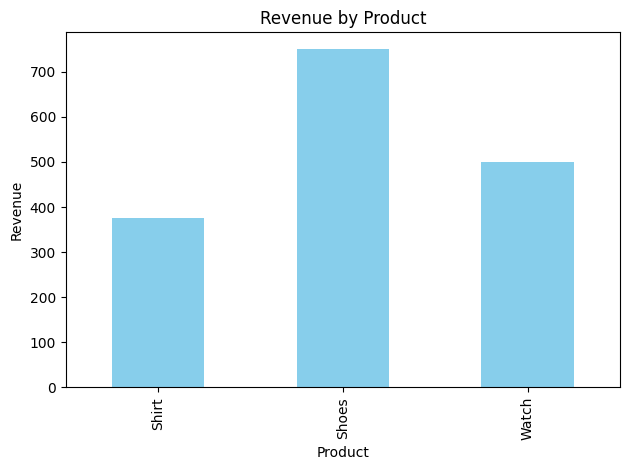

In [4]:
import matplotlib.pyplot as plt

# Plot bar chart
df.plot(kind='bar', x='product', y='revenue', color='skyblue', legend=False)

# Add Labels and title
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()

# Save the chart as image file
plt.savefig("sales_chart.png")
plt.show()